# Постановка задачи

Описание задачи

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Описание датасета (переменные, которые содержит датасет):

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

# 1 Загрузка и первичная обработка данных

In [1]:
# загрузка модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random
# настройка
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
# считываем исходный датасет
stud = pd.read_csv('stud_math.csv')

In [3]:
# проверим успешность вывода данных
display(stud.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
# теперь проверим все ли столбцы, что есть в описании загрузились
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Загрузилось 30 столбцов, а в описании 29
Всего 395 записей
Из описания датасета и первичного осмотра видно, что: 
Числовые - 3 : age, absences, score

Бинарные - 13: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school

Оценочные - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

Остальные - 1: , studytime_granular 

столбец 'studytime, granular' - отсутствует в описании

столбец studytime, granular из-за своего отсутствия в описании вызывает подозрение. исходя из названия посмотрим на его связь с studytime

In [5]:
stud.loc[:, ['studytime', 'studytime, granular']]

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [6]:
stud.loc[:, ['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


видна корреляция с КК = -1. 100% обратная зависимость.
Столбец 'studytime, granular' удален, так как он на 100% обратно скоррелирован с studytime. 

In [7]:
# Я принял решение удалить столбец study_gran
stud.drop(['studytime, granular'], inplace=True, axis=1)
display(stud.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Столбец 'studytime, granular' удален, так как он имеет 100% обратную зависимость с studytime. И избавиться от лишних данных лучше в начале

In [8]:
# переименуем столбцы для стандартизации и удобства
stud.rename(columns={'famsize': 'fam_size',
                     'Pstatus': 'p_status',
                     'Medu': 'm_edu',
                     'Fedu': 'f_edu',
                     'Mjob': 'm_job',
                     'Fjob': 'f_job',
                     'traveltime': 'travel_time',
                     'studytime': 'study_time',
                     'schoolsup': 'school_sup',
                     'famsup': 'fam_sup',
                     'famrel': 'fam_rel',
                     'freetime': 'free_time',
                     'goout': 'go_out'}, inplace=True)
stud.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time',
       'go_out', 'health', 'absences', 'score'],
      dtype='object')

# 2 исследование распределения признаков числовых переменных, устранение выбросов

-Числовых - 3 : age, absences, score

In [9]:
stud.age.isnull().sum()
# пропусков в данных нет

0

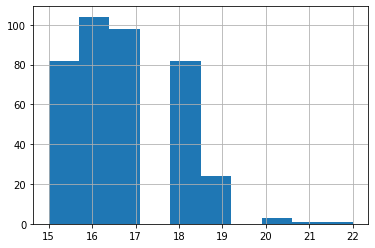

In [10]:
# age
stud.age.hist()
# при стандартном значении bins кажется что есть пропущенные значения/выбросы
# в общем мало информативно

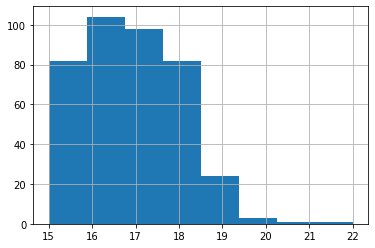

In [11]:
stud.age.hist(bins=8)
# bins подобрано опытным путем для большей детализации

In [12]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

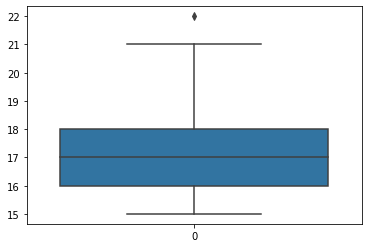

In [13]:
# построим boxplot чтобы проверить на наличие выбросов
sns.boxplot(data=stud.age)

25-й перцентиль: 16.0, медиана: 17.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


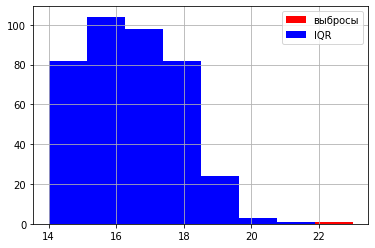

In [14]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      'медиана: {},'.format(median),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.age.loc[stud.age >= 14].hist(bins=8,
                                  range=(14, 23),
                                  color='red',
                                  label='выбросы')

stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=8,
                                                                        range=(
                                                                            14, 23),
                                                                        color='blue',
                                                                        label='IQR')

plt.legend()

 Исследовали статистику по возрасту учеников
Получили перцентили, медиану, выброс
22 года считается выбросом, но в информации о данном параметре указано, что 
 возраст ученика (от 15 до 22) потому данное значение удалять не буду
объяснить такое распределение признака могу тем, что большая часть учеников
заканчивает школу вовремя - до 18 лет. Однако встречаются ученики постарше, 
видимо из-за неуспеваемости или это решение пересдать экзамен (вдруг решил в другой вуз перевестись)

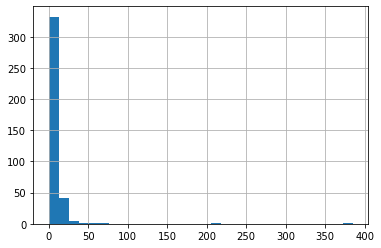

In [15]:
# absences
stud.absences.hist(bins=30)
# bins подбирался опытным путем для наглядности

In [16]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [17]:
stud.absences.isnull().sum()
# пропуски в данных имеются

12

12 пропусков это около 3%. Я принял решение удалить строки с пропусками

In [18]:
stud = stud.dropna(axis='index', how='any', subset=['absences'])
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       383 non-null    object 
 1   sex          383 non-null    object 
 2   age          383 non-null    int64  
 3   address      368 non-null    object 
 4   fam_size     359 non-null    object 
 5   p_status     340 non-null    object 
 6   m_edu        380 non-null    float64
 7   f_edu        359 non-null    float64
 8   m_job        365 non-null    object 
 9   f_job        348 non-null    object 
 10  reason       366 non-null    object 
 11  guardian     352 non-null    object 
 12  travel_time  355 non-null    float64
 13  study_time   378 non-null    float64
 14  failures     361 non-null    float64
 15  school_sup   374 non-null    object 
 16  fam_sup      344 non-null    object 
 17  paid         344 non-null    object 
 18  activities   369 non-null    object 
 19  nursery 

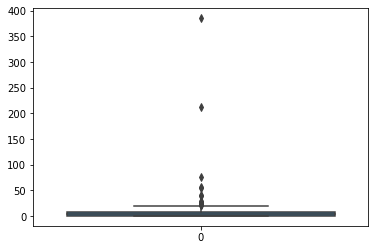

In [19]:
# построим boxplot чтобы проверить на наличие выбросов
sns.boxplot(data=stud.absences)

Разброс данных очень большой от 0 до 385 потому boxplot имеет крупный масштаб и как по мне кажется не очень информативным

25-й перцентиль: 0.0, медиана: 4.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


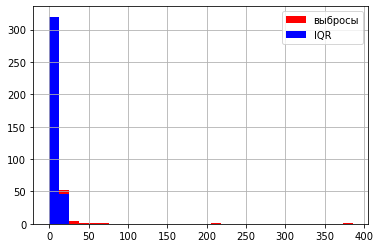

In [20]:
# сделаем подровный анализ границ и расчитаем их точные значения
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      'медиана: {},'.format(median),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.absences.loc[stud.absences >= 0].hist(bins=30,
                                           range=(-1, 386),
                                           color='red',
                                           label='выбросы')

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=30,
                                                                                  range=(-1,
                                                                                         386),
                                                                                  color='blue',
                                                                                  label='IQR')

plt.legend()

Вот на этом этапе для информативности я подбирал bins и , соответственно , изменил его значение в гистограмме сделанной раннее.

Нижняя граница не может быть меньше 0
Верхняя граница выбросов определена как 20, но по гистограмме видно, что 
после 20 попадает достаточно наблюдений и кажется что выбросов много.

Я не вспомнил на какое распределение похожа наша гистограмма, предположу что это экспоненциальное или гамма(при определенных параметрах) потому что они имеют большие значения слева и длинный хвост справа 

In [21]:
print("Количество учеников с числом пропусков больше 20: ",
      len(stud[stud['absences'] > 20]))

Количество учеников с числом пропусков больше 20:  17


17 Это меньше 5% от общего числа
Предполагаю что внеурочные увлечения/занятия и здоровье могут влиять на кол-во пропусков.
Записей мало потому решил не группировать их

In [22]:
stud[stud['absences'] > 20][['activities',
                             'romantic', 'health', 'go_out', 'free_time']]

,activities,romantic,health,go_out,free_time
40,yes,yes,3.0,3.0,3.0
74,yes,no,5.0,3.0,NaN
103,no,no,2.0,5.0,3.0
183,yes,yes,1.0,3.0,3.0
198,no,no,2.0,4.0,2.0
205,no,yes,5.0,3.0,4.0
216,no,yes,1.0,5.0,4.0
222,no,no,3.0,1.0,3.0
260,no,yes,2.0,2.0,1.0
276,no,yes,5.0,1.0,1.0


никакой явной зависимости не читается. может это связано с возрастом? Вдруг участи принимали студенты или же работающие люди которые для допуска к экзамену зачислились в школу но не ходили ввиду другой занятости.

In [23]:
stud[stud['absences'] > 20]['age'].value_counts()

17    6
19    3
18    3
16    3
20    1
15    1
Name: age, dtype: int64

Да, в основном это ребята постарше. Видимо второгодки. Я принял решение не считать данные значения выбросами и не удалять их

In [24]:
# score
stud.score.isnull().sum()

5

Посмотрим на значения с пропусками

In [25]:
stud[stud.score.isnull()]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [26]:
# Удалим  строки в которых score отсутствует значение
stud = stud.dropna(axis='index', how='any', subset=['score'])
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       378 non-null    object 
 1   sex          378 non-null    object 
 2   age          378 non-null    int64  
 3   address      364 non-null    object 
 4   fam_size     354 non-null    object 
 5   p_status     335 non-null    object 
 6   m_edu        375 non-null    float64
 7   f_edu        354 non-null    float64
 8   m_job        360 non-null    object 
 9   f_job        343 non-null    object 
 10  reason       361 non-null    object 
 11  guardian     347 non-null    object 
 12  travel_time  350 non-null    float64
 13  study_time   373 non-null    float64
 14  failures     356 non-null    float64
 15  school_sup   369 non-null    object 
 16  fam_sup      340 non-null    object 
 17  paid         340 non-null    object 
 18  activities   364 non-null    object 
 19  nursery 

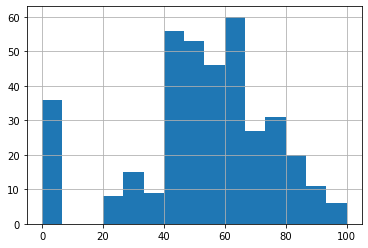

In [27]:
stud.score.hist(bins=15)

если бы не левый столбец гистограммы можно было бы утверждать о нормально распределении

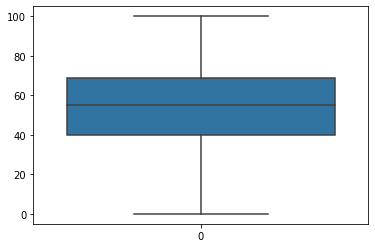

In [28]:
sns.boxplot(data=stud.score)

25-й перцентиль: 40.0, медиана: 55.0, 75-й перцентиль: 68.75, IQR: 68.75,  Границы выбросов: [-63.125, 171.875].


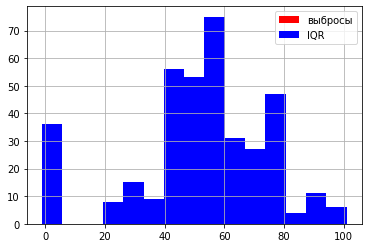

In [29]:
# сделаем анализ границ и расчитаем их точные значения
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      'медиана: {},'.format(median),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.score.loc[stud.score >= 0].hist(bins=15,
                                     range=(-1, 101),
                                     color='red',
                                     label='выбросы')

stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=15,
                                                                            range=(-1,
                                                                                   101),
                                                                            color='blue',
                                                                            label='IQR')

plt.legend()

In [30]:
stud.score.value_counts()

50.0     53
55.0     46
0.0      36
75.0     31
65.0     31
40.0     29
60.0     29
70.0     27
45.0     27
80.0     16
30.0     15
90.0     11
35.0      9
25.0      7
95.0      5
85.0      4
100.0     1
20.0      1
Name: score, dtype: int64

Предполагаю, что люди получившие на экзамене 0 либо пропустили экзамен либо были дискфалифицированы или же нашлись иные причины.
Считаю это своего рода аномалией. Взглянем на данные без нулевого результата экзамена.
Так же возможна произошла ошибка при сборе или записи данных данных

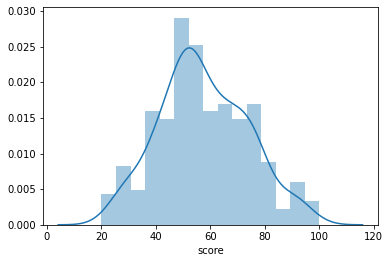

In [31]:
not_zero_score = stud.score.apply(lambda x: x if x > 0 else np.nan)
sns.distplot(not_zero_score, bins=15)

хорошо видна нормальность распределения

25-й перцентиль: 45.0, медиана: 55.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


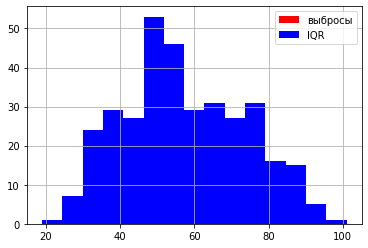

In [32]:
median = not_zero_score.median()
IQR = not_zero_score.quantile(0.75) - not_zero_score.quantile(0.25)
perc25 = not_zero_score.quantile(0.25)
perc75 = not_zero_score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      'медиана: {},'.format(median),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


not_zero_score.loc[not_zero_score <= 101].hist(bins=15,
                                               range=(19, 101),
                                               color='red',
                                               label='выбросы')

not_zero_score.loc[not_zero_score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=15,
                                                                                    range=(
                                                                                        19, 101),
                                                                                    color='blue',
                                                                                    label='IQR')

plt.legend()

Результаты с нулем :
25-й перцентиль: 40.0, медиана: 55.0, 75-й перцентиль: 68.75, IQR: 68.75,  Границы выбросов: [-63.125, 171.875].

Результаты только ненулевые:
25-й перцентиль: 45.0, медиана: 55.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].

Очевидно как изменились границы выбросов
Ненулевые значения имеют нормальное распределение, достаточно большая дисперсия.
Для дальнейшей работы и изучения влияния факторов на оценку по экзамену считаю что нулевой результат на экзамене необходимо считать за выброс и удалить данные строки.
Таких значений 36(чуть менее 10%).
            

In [33]:
stud = pd.DataFrame(stud[stud['score'] != 0])
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       342 non-null    object 
 1   sex          342 non-null    object 
 2   age          342 non-null    int64  
 3   address      329 non-null    object 
 4   fam_size     321 non-null    object 
 5   p_status     303 non-null    object 
 6   m_edu        340 non-null    float64
 7   f_edu        321 non-null    float64
 8   m_job        326 non-null    object 
 9   f_job        311 non-null    object 
 10  reason       327 non-null    object 
 11  guardian     313 non-null    object 
 12  travel_time  319 non-null    float64
 13  study_time   337 non-null    float64
 14  failures     322 non-null    float64
 15  school_sup   333 non-null    object 
 16  fam_sup      306 non-null    object 
 17  paid         307 non-null    object 
 18  activities   330 non-null    object 
 19  nursery 

# 3 Оценка количества уникальных значений для номинативных переменных

-Бинарных - 12: sex, address, fam_size, p_status, school_sup, fam_sup, paid, activities, nursery, higher, internet, romantic,school

-Номинативны - 13: m_edu, f_edu, m_job, f_job, reason, guardian, travel_time, study_time, failures, famrel, free_time, go_out, health


К бинарным принакам я отнес не только те признаки где возможны варианты "yes\no", но и те в которых мозможно только 2 варианта значения. Их много, обрабатывать каждый по отдельности - трудоемко, потому обработаю их группой

In [34]:
binary_values = ['sex', 'address', 'fam_size', 'p_status', 'school_sup', 'fam_sup',
                 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'school']

In [35]:
for value in binary_values:
    display(pd.DataFrame(stud[value].value_counts()))
    print('пропусков в столбце {} :'.format(value), stud[value].isnull().sum())

,sex
F,179
M,163


пропусков в столбце sex : 0


,address
U,259
R,70


пропусков в столбце address : 13


,fam_size
GT3,225
LE3,96


пропусков в столбце fam_size : 21


,p_status
T,269
A,34


пропусков в столбце p_status : 39


,school_sup
no,286
yes,47


пропусков в столбце school_sup : 9


,fam_sup
yes,191
no,115


пропусков в столбце fam_sup : 36


,paid
no,166
yes,141


пропусков в столбце paid : 35


,activities
yes,167
no,163


пропусков в столбце activities : 12


,nursery
yes,265
no,65


пропусков в столбце nursery : 12


,higher
yes,312
no,12


пропусков в столбце higher : 18


,internet
yes,265
no,49


пропусков в столбце internet : 28


,romantic
no,211
yes,102


пропусков в столбце romantic : 29


,school
GP,302
MS,40


пропусков в столбце school : 0


In [36]:
stud[binary_values].describe()

,sex,address,fam_size,p_status,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,school
count,342,329,321,303,333,306,307,330,330,324,314,313,342
unique,2,2,2,2,2,2,2,2,2,2,2,2,2
top,F,U,GT3,T,no,yes,no,yes,yes,yes,yes,no,GP
freq,179,259,225,269,286,191,166,167,265,312,265,211,302


По нашим бинарным признакам получены списки уникальных значений(По поводу пола сомнений не было , но процедуру надо соблюдать).
Везде 2 уникальных значения, имеются пропуски не более 10%
Наибольшее количество пропусков - p_status.
Сразу бросается в глаза потенциальная зависимость параметров 
address c travel_time.

Теперь приступим к изучению номинативных переменных (m_edu, f_edu, m_job, f_job, reason, guardian, travel_time, study_time, failures, fam_rel, free_time, go_out, health)

In [37]:
rating_values = ['m_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian',
                 'travel_time', 'study_time', 'failures', 'fam_rel', 'free_time',
                 'go_out', 'health']

m_edu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [38]:
pd.DataFrame(stud.m_edu.value_counts())

,m_edu
4.0,122
2.0,85
3.0,85
1.0,45
0.0,3


In [39]:
stud.m_edu.isnull().sum()

2

In [40]:
stud.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   340 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


m_edu - 5 уникальных значений как в описании. Имеются пропуски - заполнение пропусков невозможно из-за нехват

f_edu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [41]:
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,92
3.0,87
4.0,75
1.0,64
0.0,2
40.0,1


Видим выброс со значением 40. Мне кажется что имел место человеческий фактор, это опечатка и тут должно быть значение 4.

In [42]:
stud.loc[stud['f_edu'] == 40.0, 'f_edu'] = 4.0
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,92
3.0,87
4.0,76
1.0,64
0.0,2


In [43]:
stud.f_edu.isnull().sum()

21

In [44]:
stud.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   321 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


f_edu - 5 уникальных значений как в описании. Имеется 21 пропуск - заполнение пропусков невозможно. Выброс/ошибка данных устранен.

m_job — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [45]:
pd.DataFrame(stud.m_job.value_counts())

,m_job
other,113
services,87
teacher,49
at_home,47
health,30


In [46]:
stud.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   326 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


In [47]:
stud.m_job.isnull().sum()

16

m_job - пять уникальных значений как в описании. 19 строк в которых значения неизвестны. Заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много.

f_job — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [48]:
pd.DataFrame(stud.f_job.value_counts())

,f_job
other,172
services,87
teacher,24
health,14
at_home,14


In [49]:
stud.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   311 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


In [50]:
stud.f_job.isnull().sum()

31

f_job - 5 уникальных значений как в описании. 31 пропуск(~10%). Доля пропучков ощутима, но их можно заполнить случайным образом установив services или other т.к. это явнодоминирующие значения. 
Заполним пропуски случайным образом установив категорию services или other.

In [51]:
f_job_list = ['services', 'other']
stud.f_job = stud.f_job.apply(
    lambda x: random.choice(f_job_list) if pd.isna(x) else x)
stud.f_job.isnull().sum()

0

In [52]:
pd.DataFrame(stud.f_job.value_counts())

,f_job
other,188
services,102
teacher,24
health,14
at_home,14


Пропуски заполнили.

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [53]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,114
reputation,92
home,89
other,32


In [54]:
stud.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  327 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


In [55]:
stud.reason.isnull().sum()

15

reason - 5 уникальных значений как в описании. Аномалий не замечено. 15 пропусков, заполнить пока невозможно из-за большого выбора значений и отсутсвия явно выраженного преобладания определенного

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [56]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,217
father,76
other,20


In [57]:
stud.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  313 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


In [58]:
stud.guardian.isnull().sum()

29

guardian - 3 уникальных значения как в описании. 29(~10%) строк в которых значения неизвестны. Можно было бы заполнить значением mother т.к. оно самое преобладающее но это в след этапе

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [59]:
pd.DataFrame(stud.travel_time.value_counts())

,travel_time
1.0,211
2.0,84
3.0,17
4.0,7


In [60]:
stud.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  319 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [61]:
stud.travel_time.isnull().sum()

23

 traveltime - 4 уникальных значения как в описании. 23 строк в которых значения неизвестны. У нас просится пара значений для взаимного заполнения пропусков address-travel_time. Заполнение проведу на след этапе

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Учеников живущих в городе:  259
Учеников живущих за городом:  70
Учеников живущих в <30 минут от школы:  295
Учеников живущих в 30-60 минутах от школы:  24
Пропущенных address:  13
Пропущенных travel_time:  23


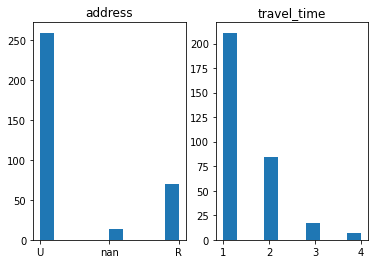

In [62]:
#stud.travel_time  = stud.travel_time.astype(object)
fig, axs = plt.subplots(1, 2)
axs[0].hist(list(stud.address))
axs[0].set_title('address')
axs[1].hist(stud.travel_time)
axs[1].set_title('travel_time')
print('Учеников живущих в городе: ', len(stud[stud['address'] == 'U']))
print('Учеников живущих за городом: ', len(stud[stud['address'] == 'R']))
print('Учеников живущих в <30 минут от школы: ', len(stud[(stud['travel_time'] == 1.0) |
                                                          (stud['travel_time'] == 2.0)]))
print('Учеников живущих в 30-60 минутах от школы: ', len(stud[(stud['travel_time'] == 3.0) |
                                                              (stud['travel_time'] == 4.0)]))
print('Пропущенных address: ', stud.address.isnull().sum())
print('Пропущенных travel_time: ', stud.travel_time.isnull().sum())

Я сделал вывод , что большинство учеников из первой и второй категорий параметра travel_time живут в черте города, из третьей и четвертой - за городом. Аналогично и обратное. Считаю что пропуски в данных колонках можно заполнить через друг друга

In [63]:
# я решил здесь использовать другой способ восстановления данных - моду
# свой выбор объясняю тем, что в обоих параметрах address,travel_time есть
# явно выраженное преобладание конкретного значения
stud.address = stud.address.fillna(stud.address.mode()[0])
stud.travel_time = stud.travel_time.fillna(stud.travel_time.mode()[0])
print(stud.address.isnull().sum())
print(stud.travel_time.isnull().sum())

0
0


studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [64]:
pd.DataFrame(stud.study_time.value_counts())

,study_time
2.0,169
1.0,88
3.0,56
4.0,24


In [65]:
stud.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  337 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [66]:
stud.study_time.isnull().sum()

5

studytime - 4 уникальных значения (оценки). 5 пропусков (~1%).


failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [67]:
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,264
1.0,37
2.0,11
3.0,10


In [68]:
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  322 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [69]:
stud.failures.isnull().sum()

20

failures - 4 уникальных значения , 20 пропусков. Пропуски можно заполнить установив явно преобладающее значение - "0.0"
Сомнительная характеристика т.к. 0 неудач и более 3 неудач попадают в одну категорию...Но что поделать, разделить это мы никак не можем

 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [70]:
pd.DataFrame(stud.fam_rel.value_counts())

,fam_rel
4.0,156
5.0,87
3.0,54
2.0,14
1.0,6
-1.0,1


Видим выброс "-1.0" , очень похоже на "1.0", видимо вмешался человеский фактор. Исправим

In [71]:
stud.loc[stud['fam_rel'] == -1.0, 'fam_rel'] = 1.0
pd.DataFrame(stud.fam_rel.value_counts())

,fam_rel
4.0,156
5.0,87
3.0,54
2.0,14
1.0,7


In [72]:
stud.loc[:, ['fam_rel']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  318 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [73]:
stud.fam_rel.isnull().sum()

24

famrel - пять уникальных значения как в описании. 24 строки в которых значения неизвестны. Заполнить пропуски на данный момент невозможно, так как вариантов для заполнения слишком много

free_time — свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [74]:
pd.DataFrame(stud.free_time.value_counts())

,free_time
3.0,129
4.0,98
2.0,57
5.0,34
1.0,16


In [75]:
stud.loc[:, ['free_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  334 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [76]:
stud.free_time.isnull().sum()

8

free_time - 5 уникальных значений как в описании, аномалий/выбросов нет. 8 пустых значений, их заполнение невозможно из-за большого числа возможных значений

go_out — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [77]:
pd.DataFrame(stud.go_out.value_counts())

,go_out
3.0,114
2.0,90
4.0,72
5.0,41
1.0,19


In [78]:
stud.loc[:, ['go_out']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  336 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [79]:
stud.go_out.isnull().sum()

6

go_out - 5 уникальных значений как в описании, аномалий/выбросов нет. 6 пустых значений, их заполнение невозможно из-за большого числа возможных значений

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [80]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,121
3.0,79
4.0,51
1.0,42
2.0,36


In [81]:
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  329 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [82]:
stud.health.isnull().sum()

13

health - 5 уникальных значения как в описании. 13 строк в которых значения пропущены. Заполнить пропуски невозможно, т.к. вариантов для заполнения много, а явно доминирующего нет.

# 4 Корреляционный анализ количественных переменных

Рассмотрим сначала только числовые столбцы

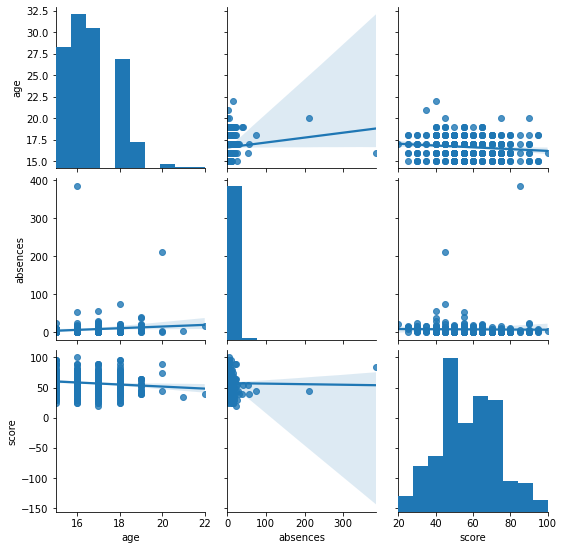

In [83]:
stud_num = stud[['age', 'absences', 'score']]
sns.pairplot(stud_num, kind='reg')

In [84]:
stud_num.corr()

,age,absences,score
age,1.000000,0.112599,-0.132932
absences,0.112599,1.000000,-0.014039
score,-0.132932,-0.014039,1.000000


Видим что имеется обратная корреляция результата score и возраста.

Число прогулов слабо коррелирует с результатом экзамена score.

age и absences имеют слабую корреляцию, можно оставить оба.

# 5 Корреляционный анализ бинырных переменных

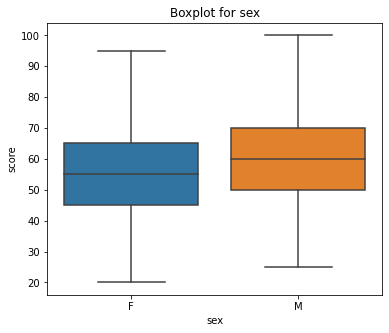

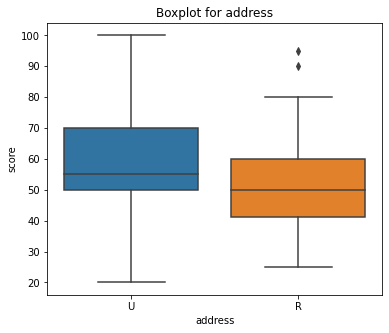

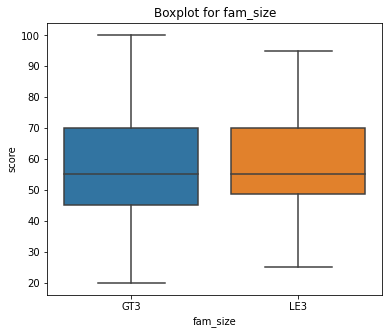

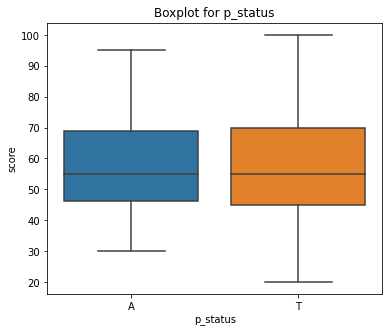

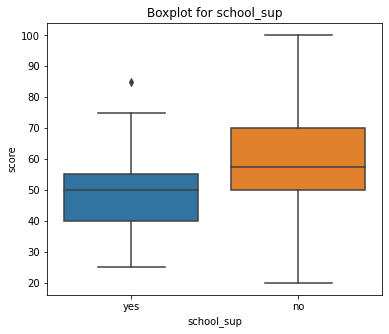

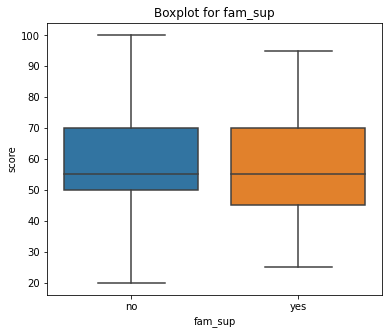

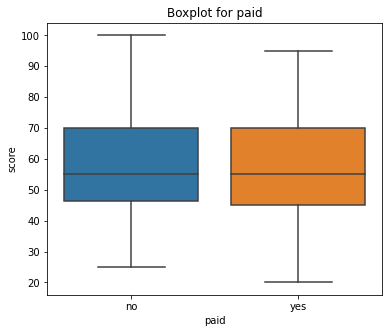

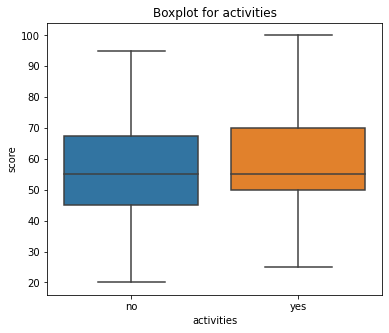

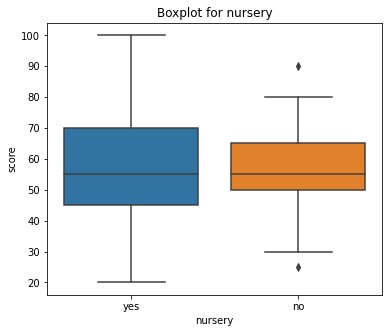

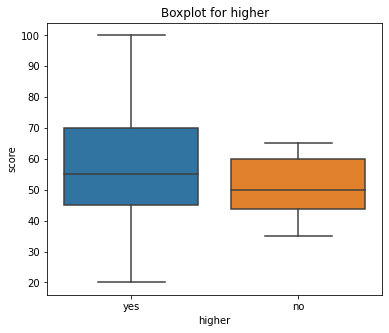

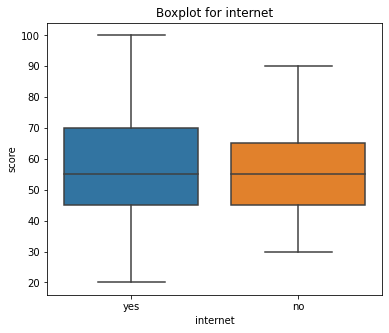

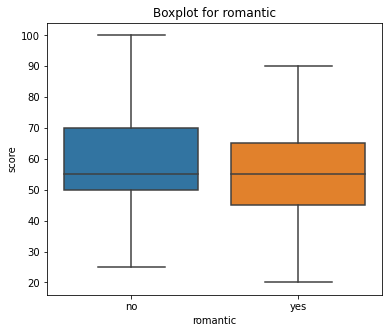

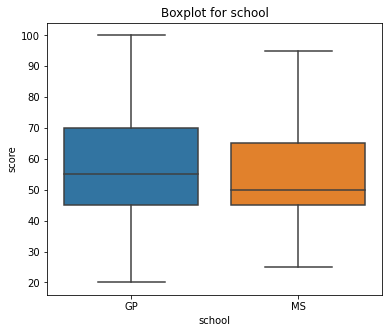

In [85]:
#binary_values=['sex', 'address', 'fam_size', 'p_status', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic','school']
# функция для бинарных
for col in stud[binary_values].columns.values:
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.boxplot(x=col, y='score', data=stud, ax=ax)
    ax.set_title('Boxplot for '+col)
    plt.show()

визуально кажется имеются различия в плотности распределения следующих распределений :

schoolsup

nursery

higher

посмотрим тест Стюдента

# 5 Корреляционный анализ оценочных категориальных признаков

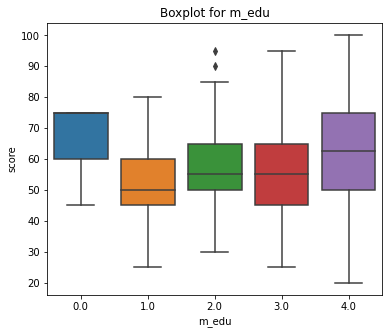

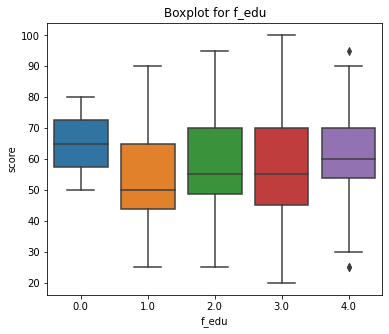

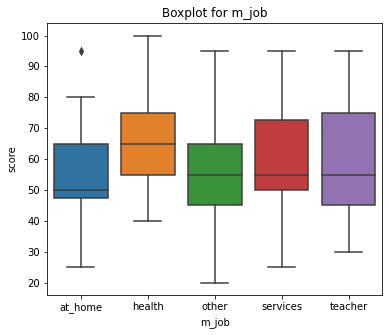

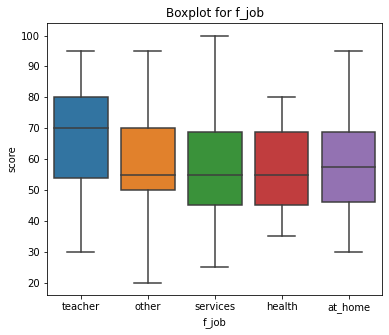

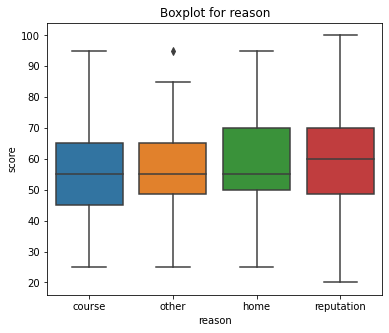

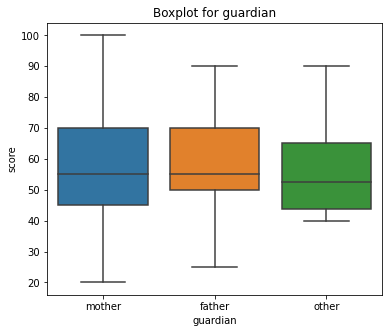

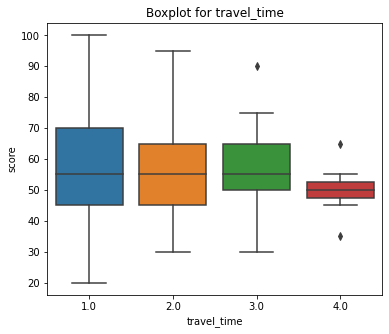

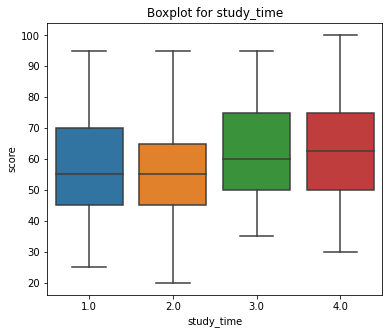

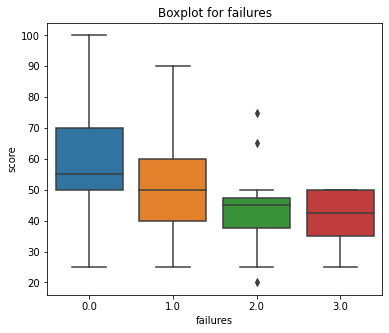

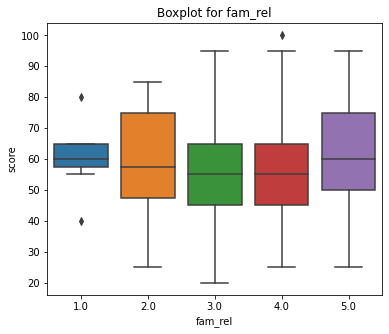

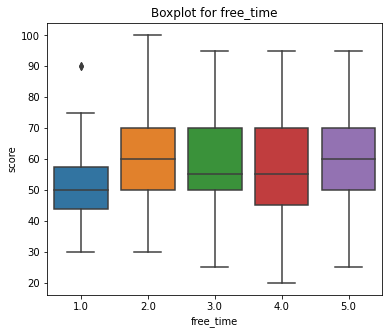

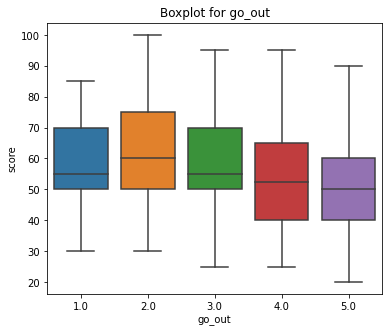

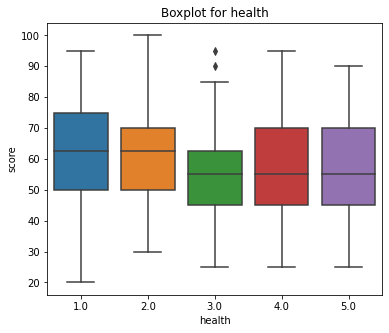

In [86]:
for col in stud[rating_values].columns.values:
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.boxplot(x=col, y='score', data=stud, ax=ax)
    ax.set_title('Boxplot for '+col)
    plt.show()

визуально кажется имеются различия в плотности распределения следующих распределений :

m_edu

f_edu

m_job

f_job

travel_time

failures

health

посмотрим тест Стюдента

# 6 Тест Стьюдента по всем категориальным признакам

In [87]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [88]:
for col in stud.columns.values:
     get_stat_dif(col)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки study_time
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки school_sup
Найдены статистически значимые различия для колонки go_out
Найдены статистически значимые различия для колонки score


Тест Стьюдента -  достаточно отличаются 7 параметров: address, m_edu, m_job, study_time, failures, school_sup, go_out. Оставим эти переменные в датасете для дальнейшего построения модели. 

Добавим в модель к числовым признакам признаки, которые показал нам тест Стьюдента

In [89]:
model_stud = pd.DataFrame(stud[['age', 'absences', 'score', 'address', 'm_edu',
                                'm_job', 'study_time', 'failures', 'school_sup',
                                'go_out']])

In [90]:
display(model_stud.head())
model_stud.info()

,age,absences,score,address,m_edu,m_job,study_time,failures,school_sup,go_out
0,18,6.0,30.0,U,4.0,at_home,2.0,0.0,yes,4.0
1,17,4.0,30.0,U,1.0,at_home,2.0,0.0,no,3.0
2,15,10.0,50.0,U,1.0,at_home,2.0,3.0,yes,2.0
3,15,2.0,75.0,U,4.0,health,3.0,0.0,no,2.0
4,16,4.0,50.0,U,3.0,other,2.0,0.0,no,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 394
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         342 non-null    int64  
 1   absences    342 non-null    float64
 2   score       342 non-null    float64
 3   address     342 non-null    object 
 4   m_edu       340 non-null    float64
 5   m_job       326 non-null    object 
 6   study_time  337 non-null    float64
 7   failures    322 non-null    float64
 8   school_sup  333 non-null    object 
 9   go_out      336 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.4+ KB


посмотрим матрицу корреляции для нашей модели

In [91]:
model_stud.corr()

,age,absences,score,m_edu,study_time,failures,go_out
age,1.000000,0.112599,-0.132932,-0.127149,-0.000448,0.233725,0.119103
absences,0.112599,1.000000,-0.014039,-0.027377,-0.030187,0.089541,-0.050616
score,-0.132932,-0.014039,1.000000,0.179832,0.140565,-0.285516,-0.212253
m_edu,-0.127149,-0.027377,0.179832,1.000000,0.061920,-0.204942,0.068059
study_time,-0.000448,-0.030187,0.140565,0.061920,1.000000,-0.153100,-0.030030
failures,0.233725,0.089541,-0.285516,-0.204942,-0.153100,1.000000,0.133408
go_out,0.119103,-0.050616,-0.212253,0.068059,-0.030030,0.133408,1.000000


визуализируем тепловой картой для большей наглядности

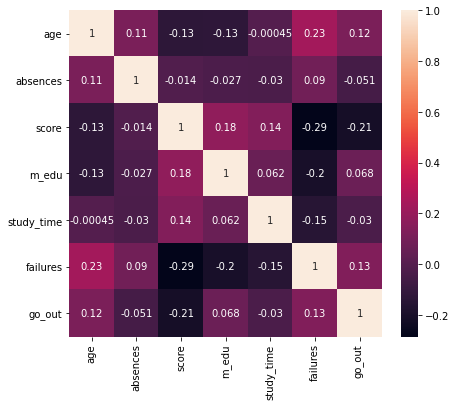

In [92]:
fig = plt.figure(figsize=(7, 6))
sns.heatmap(model_stud.corr(), annot=True)

Светлые зоны только на диагонали. Особо темные  failures-score, обратная корреляция говорящая нам что прогулы плохо сказываются на итогах учебы).
Визуальный осмотр корреляционных значений по столбцам показал, что значений КК близких к 1 или -1 нет.

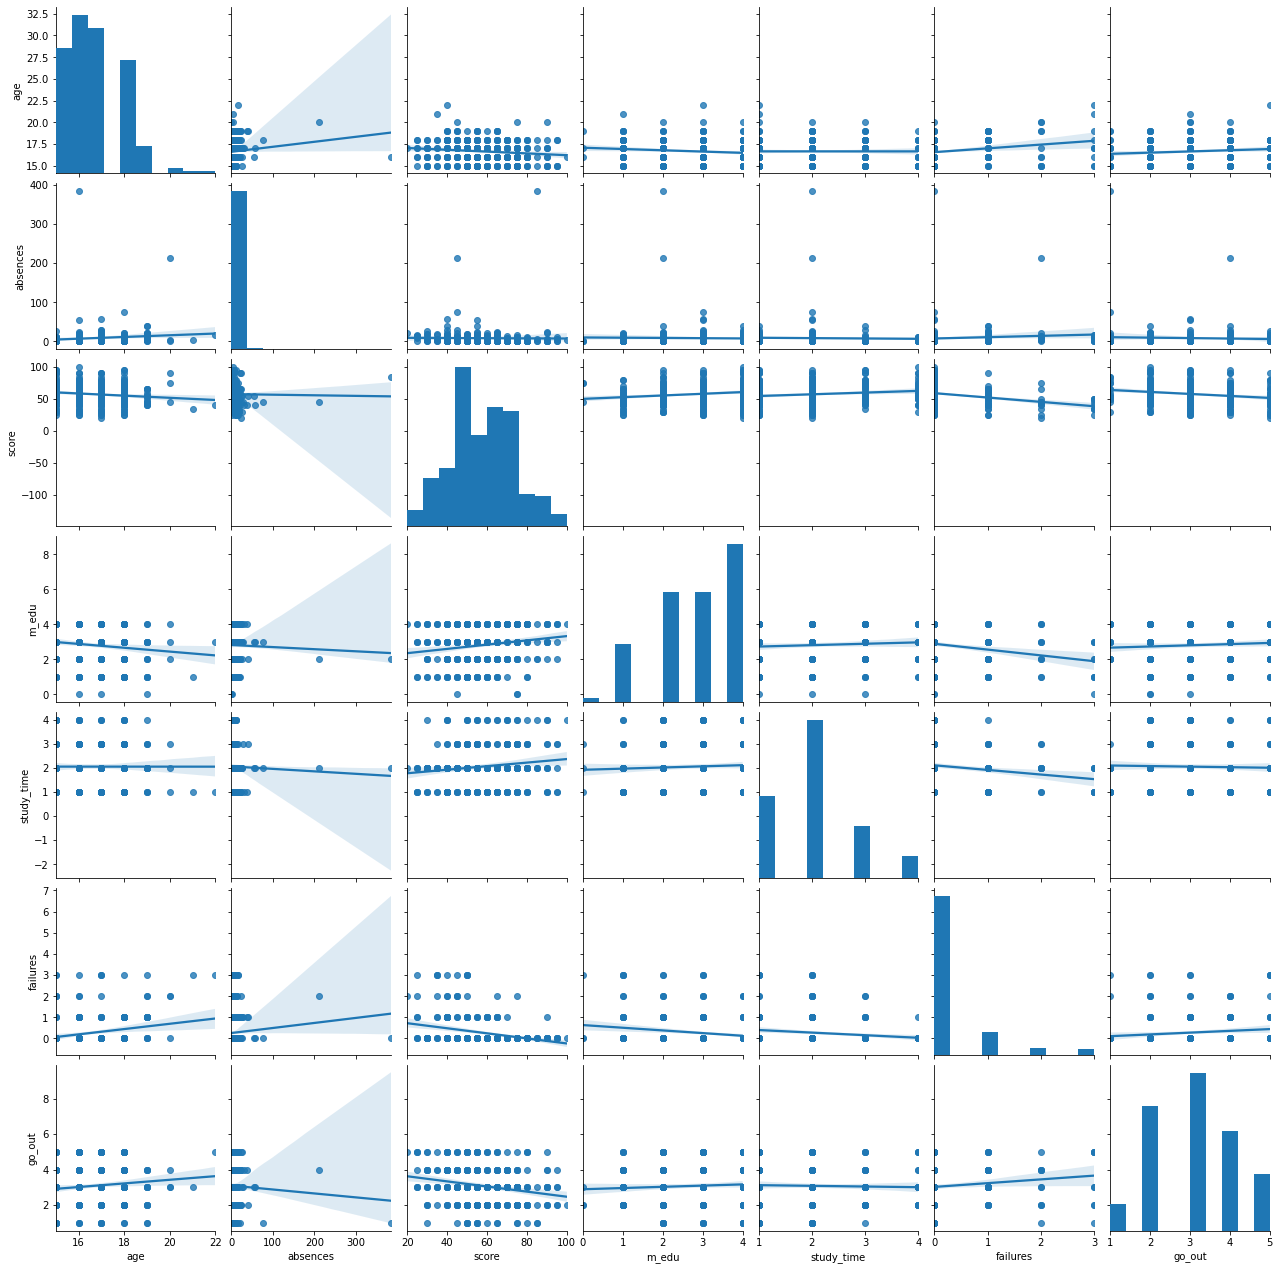

In [93]:
sns.pairplot(model_stud, kind='reg')

Теперь можно приступать к подготовке данных для моделирования

# 7 Подготовка данных для моделирования

Для построении модели необходимо, чтобы все признаками были числовыми.
Но перед преобразованием считаю необходимым для категорийных признаков написать расшифровку

Воспользуемся методом get_dummies(), чтобы преобразовать категориальные и бинарные признаки

In [94]:
for col in ['address', 'm_edu', 'm_job', 'study_time', 'failures', 'school_sup', 'go_out']:
    model_stud = model_stud.join(pd.get_dummies(model_stud[col], prefix=col))
    model_stud = model_stud.drop(columns=[col])

In [95]:
model_stud

,age,absences,score,address_R,address_U,m_edu_0.0,m_edu_1.0,m_edu_2.0,m_edu_3.0,m_edu_4.0,m_job_at_home,m_job_health,m_job_other,m_job_services,m_job_teacher,study_time_1.0,study_time_2.0,study_time_3.0,study_time_4.0,failures_0.0,failures_1.0,failures_2.0,failures_3.0,school_sup_no,school_sup_yes,go_out_1.0,go_out_2.0,go_out_3.0,go_out_4.0,go_out_5.0
0,18,6.0,30.0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1,17,4.0,30.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,15,10.0,50.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
3,15,2.0,75.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
4,16,4.0,50.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,212.0,45.0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
391,17,3.0,80.0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
392,21,3.0,35.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
393,18,0.0,50.0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0


# Выводы

в результате EDA для анализа влияния критериев датасета на модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:

1)в данных имеются пустые значения, только 3 столбца из 29 заполнены полностью. В некоторых процент пропусков доходит до 10%

2)рассматривались только данные с ненулевым результатом за экзамен score. Результат по экзамену 0.0 был удален как выброс

3)Было несколько выбросах в данных, не вошедших в итоговую модель, их происхождение связываю с человеческим фактором

4)В итоговую модель включены 'age', 'absences', 'score','address', 'm_edu', 'm_job','study_time', 'failures', 'school_sup','go_out'.

ГИПОТЕЗЫ:

1)Отрицательная корреляция age,score говорит что большинство великовозрастных учеников не дружет с учебой. Большего успеха достигают ученики, заканчивающие школу вовремя

2)Отрицательная корреляция absences,score говорит что чем меньше пропусков занятий тем выше будет score

3)Ярко выраженная отрицательная корреляция failures,core говорит что чем больше неудач по другим предметам тем ниже score

4)Ярко выраженная отрицательная корреляция go_out,score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score

5)Положительная корреляция m_edu, score говорит  что чем выше лучше образование матери тем выше score

6)Положительная корреляция m_job, score говорит  что чем выше лучше(сложнее или интеллектуальнее) работа матери тем выше score

7)Положительная корреляция study_time,score говорит что чем больше тратится времени на учебу тем выше результат

8)Положительная корреляция school_sup,score говорит что наличие доп образовательной поддержки положительно влияет на результат score

В отчете получаем подготовленный датасет model_stud